In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Advertising.csv')

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


### 1.Linear regression

#### Feature selection

In [39]:
X = df.drop('sales',axis=1)

In [41]:
X.shape

(200, 3)

In [42]:
y = df['sales']

In [43]:
y.shape

(200,)

### Linear regression model creation

In [6]:
#from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [8]:
model = LinearRegression()

In [9]:
model.fit(X_train,y_train)

LinearRegression()

#### Predicting values the model has never seen before

In [10]:
test_predictions = model.predict(X_test)
test_predictions

array([15.74131332, 19.61062568, 11.44888935, 17.00819787,  9.17285676,
        7.01248287, 20.28992463, 17.29953992,  9.77584467, 19.22194224,
       12.40503154, 13.89234998, 13.72541098, 21.28794031, 18.42456638,
        9.98198406, 15.55228966,  7.68913693,  7.55614992, 20.40311209,
        7.79215204, 18.24214098, 24.68631904, 22.82199068,  7.97962085,
       12.65207264, 21.46925937,  8.05228573, 12.42315981, 12.50719678,
       10.77757812, 19.24460093, 10.070269  ,  6.70779999, 17.31492147,
        7.76764327,  9.25393336,  8.27834697, 10.58105585, 10.63591128,
       13.01002595,  9.77192057, 10.21469861,  8.04572042, 11.5671075 ,
       10.08368001,  8.99806574, 16.25388914, 13.23942315, 20.81493419,
       12.49727439, 13.96615898, 17.56285075, 11.14537013, 12.56261468,
        5.50870279, 23.29465134, 12.62409688, 18.77399978, 15.18785675])

### 2.Let's test the model accuracy 

#### MAE

In [11]:
mean_absolute_error(y_test,test_predictions)

1.2137457736144805

#### RMSE

In [12]:
np.sqrt(mean_squared_error(y_test,test_predictions))

1.5161519375993877

#### MAPE

In [13]:
def mape(actual,pred):
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual) * 100)

print('The Mean absolute percentage error is:- ',mape(y_test,test_predictions))

The Mean absolute percentage error is:-  11.831359130546634


#### R-2 score

In [14]:
r2_score(y_test,test_predictions)

0.9185780903322446

### We can see that with Linear Regression the model accuracy achieved is 91.85%

## Let's also see the residual plots

In [15]:
test_residuals = y_test - test_predictions
test_residuals

37    -1.041313
109    0.189374
31     0.451111
89    -0.308198
66     0.327143
119   -0.412483
54    -0.089925
74    -0.299540
145    0.524155
142    0.878058
148   -1.505032
112    0.207650
174   -2.225411
55     2.412060
141    0.775434
149    0.118016
25    -3.552290
34     1.810863
170    0.843850
39     1.096888
172   -0.192152
153    0.757859
175    2.313681
61     1.378009
65     1.320379
50    -1.252073
42    -0.769259
129    1.647714
179    0.176840
2     -3.207197
12    -1.577578
133    0.355399
90     1.129731
22    -1.107800
41    -0.214921
32     1.832357
125    1.346067
196    1.421653
158   -3.281056
180   -0.135911
16    -0.510026
186    0.528079
144    1.185301
121   -1.045720
80     0.232893
18     1.216320
78    -3.698066
48    -1.453889
4     -0.339423
15     1.585066
1     -2.097274
43    -1.066159
102   -2.762851
164    0.754630
9     -1.962615
155   -2.308703
36     2.105349
190   -1.824097
33    -1.374000
45    -0.287857
Name: sales, dtype: float64

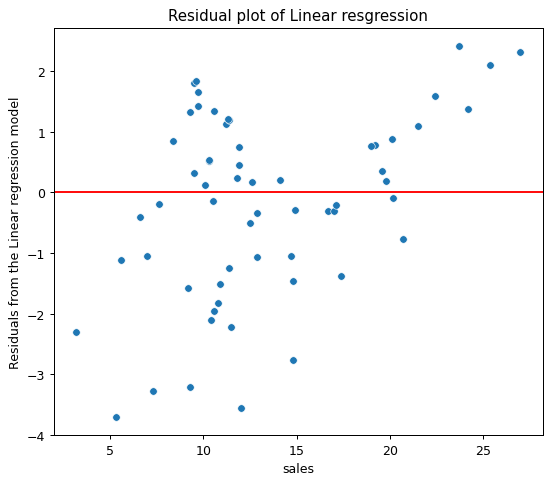

In [54]:
plt.figure(figsize=(7,6),dpi=90)
sns.scatterplot(x=y_test, y=test_residuals)
plt.ylabel('Residuals from the Linear regression model')
plt.title('Residual plot of Linear resgression')
plt.axhline(y=0,color='red');

#### With the residual plot we can see that the points are normally distributed along the regression line, though points are a bit far off from the line, but we can say that linear regression was a good choice of algo for this dataset.

### 3. Polynomial Regssion - Selecting the degree of polynomial
#### Though we have good accuracy with Linear regression, this can be further increased with Polynomial regression

#### But we need a way to decide what the order of the polynomial should be to get maximum accuracy.

One way is to run a for loop for the entire process from polynomial feature creation to finally testing the accuracy using RMSE and then plotting out them out to see which degree gives the least error so that we can create a final model it.


In [17]:
from sklearn.preprocessing import PolynomialFeatures

In [18]:
train_set_rmse = []
test_set_rmse = []

for d in range(1,10):
    
    # Creating polymial features
    polynomial_converter = PolynomialFeatures(degree = d, include_bias=False)
    poly_features = polynomial_converter.fit_transform(X)
    
    # Creating training and test set
    X_p_train, X_p_test, y_p_train, y_p_test = train_test_split(poly_features, y , test_size=0.3, random_state=101)
    
    # Polynomial Model creation
    poly_model = LinearRegression()
    poly_model.fit(X_p_train,y_p_train)
    
    # Predictions of both train and test set
    train_set_preds = poly_model.predict(X_p_train)
    test_set_preds = poly_model.predict(X_p_test)
    
    # Calculating RMSE for both train and test predictions
    train_rmse = np.sqrt(mean_squared_error(y_p_train,train_set_preds))
    test_rmse = np.sqrt(mean_squared_error(y_p_test,test_set_preds))
    
    # Storing the rmse to be later used for plotting
    train_set_rmse.append(train_rmse)
    test_set_rmse.append(test_rmse)

#### Now we have completed the whole process 

#### Let's see what the RMSE values are and plot them

In [19]:
train_set_rmse

[1.734594124329376,
 0.5879574085292231,
 0.4339344356902067,
 0.351708368839935,
 0.25093429520293764,
 0.1993333283427367,
 5.421421599418673,
 0.14237972100735366,
 0.16675080562653669]

#### From the training set RMSE values we can see that the errors are constantly going down with increase in the order of the polynomial, though at one point we can see that for &th degree it shoots up and then gradually decreases which is kind of a redflag but it decreses after that.

In [20]:
test_set_rmse

[1.5161519375993877,
 0.6646431757269196,
 0.5803286825231458,
 0.5077742624232122,
 2.5758247603436017,
 4.490868529264996,
 1381.404235838589,
 4449.568197230342,
 95893.02658131701]

#### With the testing set RMSE values we can see that after degree 4 the errors shoot up suddenly to a very high value, giving us an idea where we should stop increasing the order

### 4. Let's visualize them

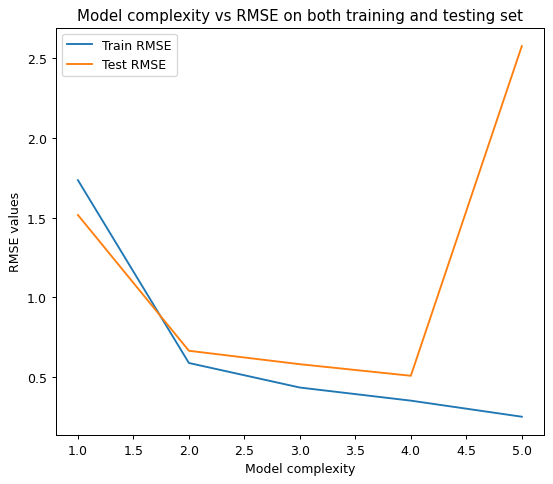

In [52]:
plt.figure(figsize=(7,6),dpi=90)
plt.plot(range(1,6),train_set_rmse[0:5],label='Train RMSE')
plt.plot(range(1,6),test_set_rmse[0:5],label='Test RMSE')
plt.xlabel('Model complexity')
plt.ylabel('RMSE values')
plt.title('Model complexity vs RMSE on both training and testing set')
plt.legend();

### Usually the training set performs a bit better than the tset test, the same can be seen above

### So even though here we see that degree 4 has less error than degree 3 but we also have to think about whether it is worth the risk to go for degree 4 instead of degree3 since we can clearly see taking up degree 4 has a high risk for shooting up the error very badly so what is suggested is that you should go for degree 3

### 5. So we'll go with degree 3 for our final Polymial regression

### 6.Final model creation

In [22]:
final_poly_converter = PolynomialFeatures(degree=3,include_bias=False)

In [44]:
final_poly_features = final_poly_converter.fit_transform(X)

In [46]:
final_poly_features.shape

(200, 19)

#### Initially we had just 3 features now as a result of using degree 3 we have the additional features which include the possible squared values of the original values and possible interaction terms

In [24]:
# training and testing data
X_f_train, X_f_test, y_f_train, y_f_test = train_test_split(final_poly_features, y , test_size=0.3, random_state=101)

In [25]:
final_poly_model = LinearRegression()

In [26]:
final_poly_model.fit(X_f_train,y_f_train)

LinearRegression()

In [27]:
final_poly_predictions = final_poly_model.predict(X_f_test)

In [28]:
final_poly_predictions

array([14.61643695, 19.05582908, 12.60687111, 17.29048144,  7.79154928,
        6.81522074, 19.95616623, 17.13228867, 10.40133525, 19.7106754 ,
        9.40989653, 13.9903597 , 11.61785875, 22.98264381, 18.94572276,
        9.40810209, 12.33293803,  9.4345693 ,  8.75310003, 21.27571609,
        6.82641505, 19.29980252, 27.39495677, 24.37200483,  9.48035288,
       11.25412703, 20.72948287,  9.6444612 , 12.52351013,  8.43482133,
        8.820211  , 19.76306453, 10.92230723,  6.96701005, 18.07890304,
        9.45074022, 10.72342248,  9.94148346,  7.0809812 , 10.76769915,
       12.02868194, 10.34152666, 11.58587308,  7.64701802, 11.89491693,
       10.74996213,  5.14790951, 15.277625  , 12.96152125, 22.42788627,
       10.71764324, 12.78031591, 14.89776582, 12.24632731, 11.12877132,
        4.91587545, 24.95013091,  9.50115418, 17.2921004 , 15.53956617])

### 7.Let's test the accuracy of the Polynomial regression model and compare it with Linear Regression

#### MAE - polynomial regression



In [29]:
print('MAE of Polynomial Regression',mean_absolute_error(y_f_test,final_poly_predictions))

MAE of Polynomial Regression 0.4127516085414077


MAE of Linear regression - 1.21

#### RMSE - polynomial regression

In [30]:
print('RMSE of Polynomial Regression',np.sqrt(mean_squared_error(y_f_test,final_poly_predictions)))

RMSE of Polynomial Regression 0.5803286825231458


RMSE of Linear regression - 1.51

We can see that both the error metrics of Polynomial regression are performing way better than Linear regression

#### R-2 score - Polynomial Regression

In [31]:
print('The r2 score is',r2_score(y_f_test,final_poly_predictions))

The r2 score is 0.988071003657938


### Polynomial Regression Model Accuracy - 98.88%

Linear Regression model accuracy - 91.85%

### Let's visualize the residual plots

In [32]:
poly_test_residuals = y_f_test - final_poly_predictions

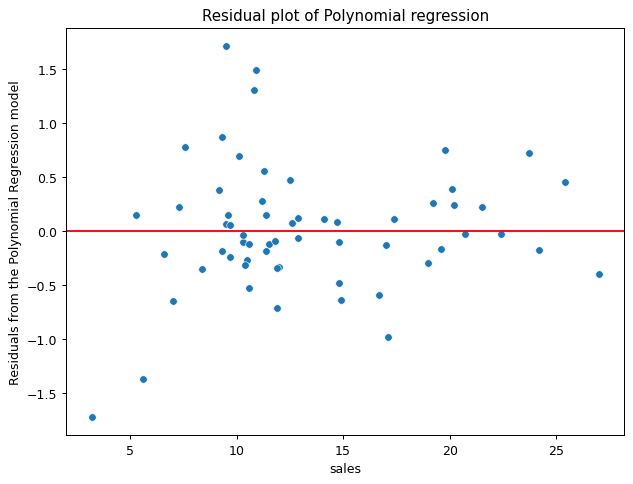

In [49]:
plt.figure(figsize=(8,6),dpi=90)
sns.scatterplot(x=y_f_test, y=poly_test_residuals)
plt.ylabel('Residuals from the Polynomial Regression model')
plt.title('Residual plot of Polynomial regression')
plt.axhline(y=0,color='red');

### Let's visualize the residual plots of Linear regression and Polynomial regression side by side

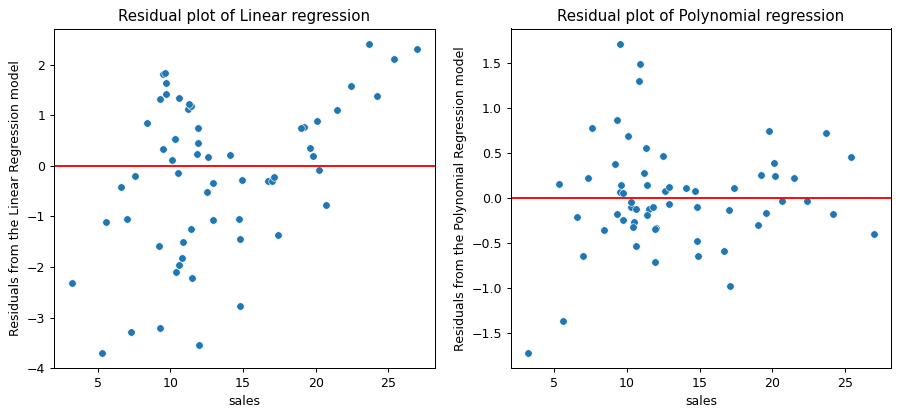

In [34]:
plt.figure(figsize=(12,5),dpi=90)
plt.subplot(1,2,1)
sns.scatterplot(x=y_test, y=test_residuals)
plt.title('Residual plot of Linear regression')
plt.ylabel('Residuals from the Linear Regression model')
plt.axhline(y=0,color='red');

plt.subplot(1, 2, 2) 
sns.scatterplot(x=y_f_test, y=poly_test_residuals)
plt.title('Residual plot of Polynomial regression')
plt.ylabel('Residuals from the Polynomial Regression model')
plt.axhline(y=0,color='red');

#### From the residual plots we can see that with less errors than Linear regression the residuals in Polynomial regression are close to the regression line, telling us that it has less errors.

## Hence from above metrics analysis we can clearly see that using higher order polynomial we get best accuracy than Linear Regression.

### We should keep in mind that this does not apply to every case, i.e. polynomial regression won't always give best accuracy, but we won't find out until we try it for ourselves.

In [35]:
# Saving the model

In [36]:
from joblib import dump

In [37]:
dump(final_poly_model,'Sales_prediction_model_poly_reg.joblib')

['Sales_prediction_model_poly_reg.joblib']

In [38]:
dump(final_poly_converter,'Final_sales_features_converter.joblib')

['Final_sales_features_converter.joblib']